In [24]:
import numpy as np  
from matplotlib import pyplot as plt, cm
import h5py
import pandas as pd
import glob
import os

In [25]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [41]:
base_folder=r"C:\temp\UOC\TrainData"
#base_folder= r'C:\Users\serra\OneDrive\Documents\DATA\train'
train_folder = base_folder + "\\img\*.h5"
mask_folder = base_folder + "\\mask\*.h5"

<KeysViewHDF5 ['img']>
(128, 128, 14)


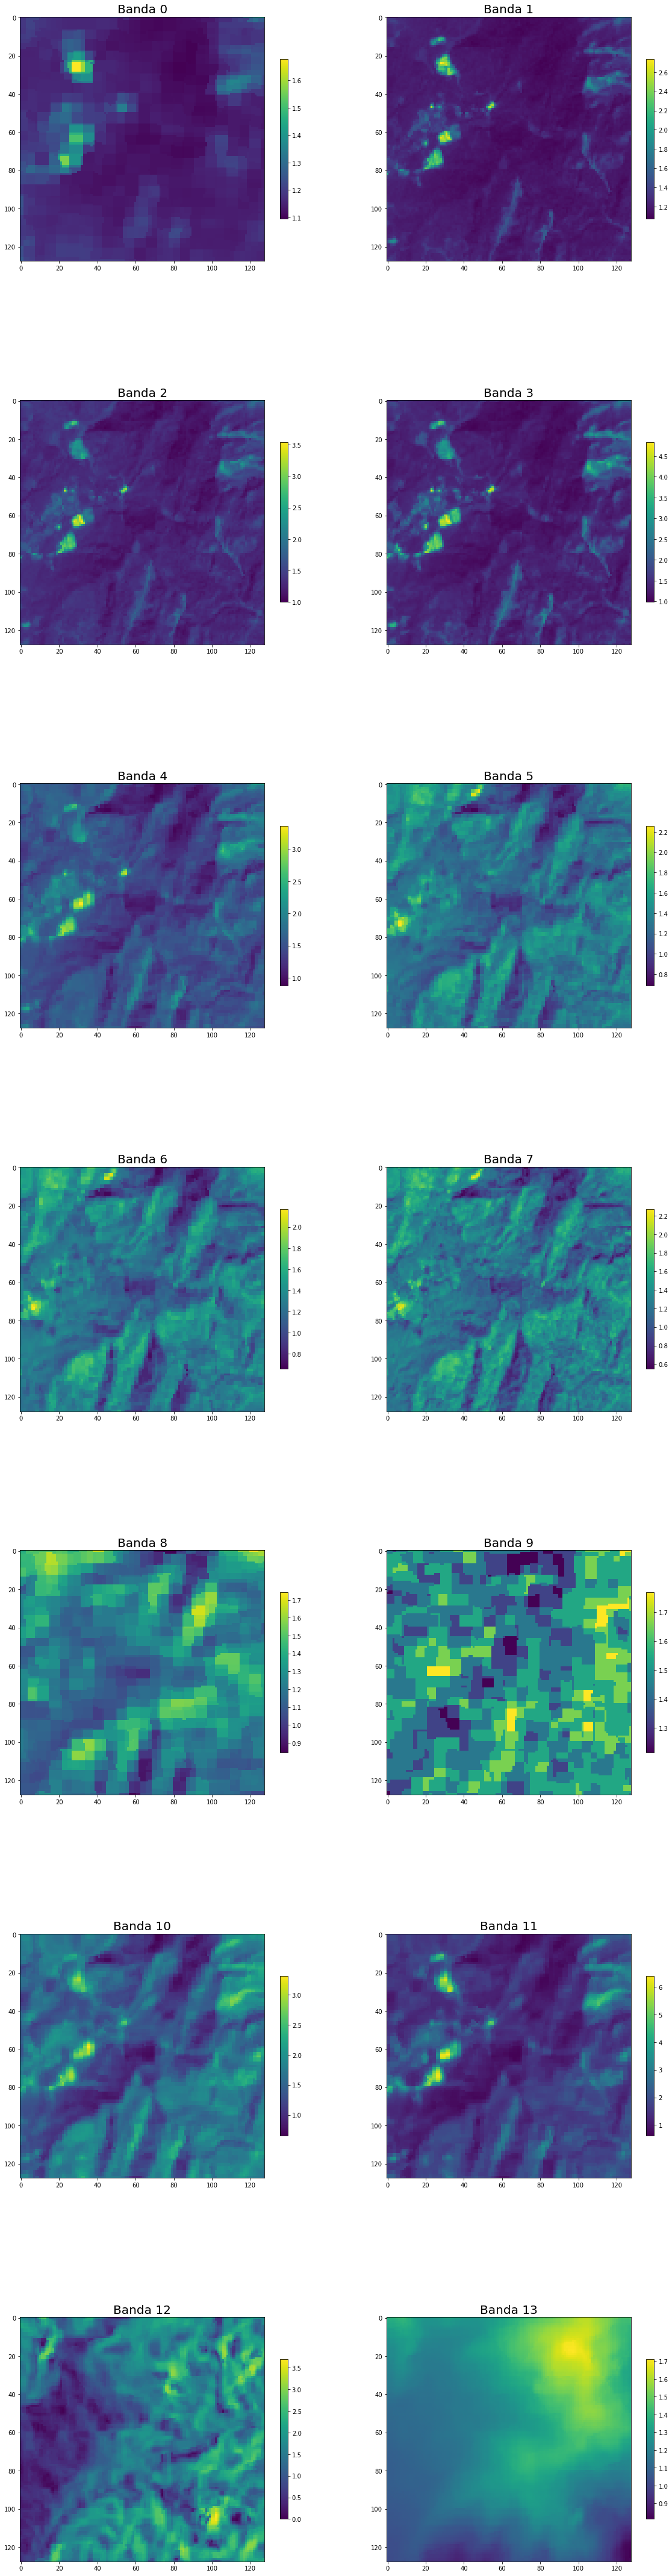

In [42]:
cmap = cm.viridis
fichero_ejemplo = os.path.join (base_folder, 'img\image_1.h5')
example_dt = h5py.File(fichero_ejemplo,'r')

print(example_dt.keys())

images = example_dt['img']
print(images.shape)

fig, ax = plt.subplots(7,2,figsize = (20,80))

for i in range(14):
    img_np = images[:,:,i]
    plt.subplot(7,2,1+i)
    #plt.figsize=(10,10)
    d= plt.imshow(img_np, cmap=cmap)
    plt.title("Banda " + str(i) ,fontdict={'fontsize': 20})
    plt.colorbar(shrink=0.5)
plt.show()


<KeysViewHDF5 ['mask']>
(128, 128)


Text(0.5, 1.0, 'Landslide')

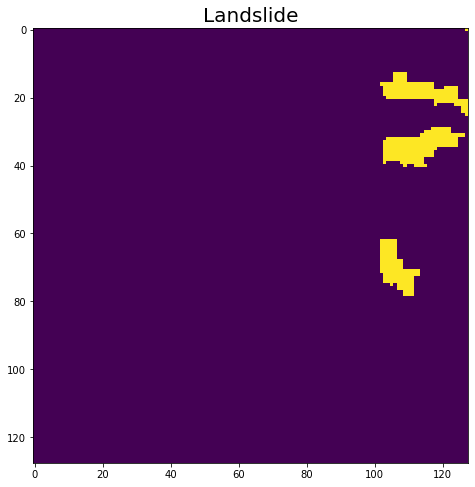

In [43]:
#load masks
fichero_mask = os.path.join (base_folder, 'mask\mask_1.h5')
example_mask = h5py.File(fichero_mask,'r')

# see what is inside that h5 file
print(example_mask.keys())

masks = example_mask['mask']
print(masks.shape)
plt.figure(figsize = (8,8))
plt.imshow(masks) 
plt.title("Landslide" ,fontdict={'fontsize': 20})

In [54]:
da_landslide = pd.DataFrame(columns={"imagen", "min_m", "max_m", "min_i", "max_i", "banda"})
bandas = ("B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9", "B10", "B11", "B12", "B13", "B14")

In [55]:
for fichero_t in glob.glob(train_folder):
    f_name = os.path.basename(fichero_t)
    f_name = f_name.replace("image", "mask")
    base_folder_m = base_folder + "\\mask"
    fichero_m = os.path.join(base_folder_m,  f_name)
    if (os.path.exists(fichero_m)):
        mask_imagen = h5py.File(fichero_m, 'r')
        masks = mask_imagen['mask']
        #l = np.count_nonzero(masks)
        #if l == 0: continue
        masks_array = np.ma.array(masks)
        train_imagen = h5py.File(fichero_t, 'r')
        imagen = train_imagen['img']
        num_bandas = imagen.shape[2]
        for i in range(num_bandas):
            banda = imagen[:, :, i]
            banda_tot = np.ma.array(banda)
            if (np.isnan(banda_tot).any()):
                print(fichero_t)
            banda_img = np.ma.masked_where(masks_array >= True, banda)
            banda_masks = np.ma.masked_where(masks_array < True, banda)
            indice = len(da_landslide)
            banda_masks = banda_masks.filled(np.nan)
            banda_img = banda_img.filled(np.nan)
            da_landslide.loc[indice, ["imagen"]] = f_name
            da_landslide.loc[indice, ["banda"]] = bandas[i]
            da_landslide.loc[indice, ["min_i"]] = np.nanmin(banda_img)
            da_landslide.loc[indice, ["max_i"]] = np.nanmax(banda_img)
            da_landslide.loc[indice, ["mean_i"]] = np.nanmean(banda_img)
            da_landslide.loc[indice, ["std_i"]] = np.nanstd(banda_img)
            da_landslide.loc[indice, ["min"]] = banda_tot.min()
            da_landslide.loc[indice, ["max"]] = banda_tot.max()
            da_landslide.loc[indice, ["std"]] = banda_tot.std()
            da_landslide.loc[indice, ["mean"]] = banda_tot.mean()
            if not (np.isnan(banda_masks).all()):
                da_landslide.loc[indice, ["min_m"]] = np.nanmin(banda_masks)
                da_landslide.loc[indice, ["max_m"]] = np.nanmax(banda_masks)
                da_landslide.loc[indice, ["mean_m"]] = np.nanmean(banda_masks)
                da_landslide.loc[indice, ["std_m"]] = np.nanstd(banda_masks)

    print(fichero_t)

C:\temp\UOC\TrainData\img\image_1.h5
C:\temp\UOC\TrainData\img\image_10.h5
C:\temp\UOC\TrainData\img\image_100.h5
C:\temp\UOC\TrainData\img\image_1000.h5
C:\temp\UOC\TrainData\img\image_1001.h5
C:\temp\UOC\TrainData\img\image_1002.h5
C:\temp\UOC\TrainData\img\image_1003.h5
C:\temp\UOC\TrainData\img\image_1004.h5
C:\temp\UOC\TrainData\img\image_1005.h5
C:\temp\UOC\TrainData\img\image_1006.h5
C:\temp\UOC\TrainData\img\image_1007.h5
C:\temp\UOC\TrainData\img\image_1008.h5
C:\temp\UOC\TrainData\img\image_1009.h5
C:\temp\UOC\TrainData\img\image_101.h5
C:\temp\UOC\TrainData\img\image_1010.h5
C:\temp\UOC\TrainData\img\image_1011.h5
C:\temp\UOC\TrainData\img\image_1012.h5
C:\temp\UOC\TrainData\img\image_1013.h5
C:\temp\UOC\TrainData\img\image_1014.h5
C:\temp\UOC\TrainData\img\image_1015.h5
C:\temp\UOC\TrainData\img\image_1016.h5
C:\temp\UOC\TrainData\img\image_1017.h5
C:\temp\UOC\TrainData\img\image_1018.h5
C:\temp\UOC\TrainData\img\image_1019.h5
C:\temp\UOC\TrainData\img\image_102.h5
C:\temp\

C:\temp\UOC\TrainData\img\image_1185.h5
C:\temp\UOC\TrainData\img\image_1186.h5
C:\temp\UOC\TrainData\img\image_1187.h5
C:\temp\UOC\TrainData\img\image_1188.h5
C:\temp\UOC\TrainData\img\image_1189.h5
C:\temp\UOC\TrainData\img\image_119.h5
C:\temp\UOC\TrainData\img\image_1190.h5
C:\temp\UOC\TrainData\img\image_1191.h5
C:\temp\UOC\TrainData\img\image_1192.h5
C:\temp\UOC\TrainData\img\image_1193.h5
C:\temp\UOC\TrainData\img\image_1194.h5
C:\temp\UOC\TrainData\img\image_1195.h5
C:\temp\UOC\TrainData\img\image_1196.h5
C:\temp\UOC\TrainData\img\image_1197.h5
C:\temp\UOC\TrainData\img\image_1198.h5
C:\temp\UOC\TrainData\img\image_1199.h5
C:\temp\UOC\TrainData\img\image_12.h5
C:\temp\UOC\TrainData\img\image_120.h5
C:\temp\UOC\TrainData\img\image_1200.h5
C:\temp\UOC\TrainData\img\image_1201.h5
C:\temp\UOC\TrainData\img\image_1202.h5
C:\temp\UOC\TrainData\img\image_1203.h5
C:\temp\UOC\TrainData\img\image_1204.h5
C:\temp\UOC\TrainData\img\image_1205.h5
C:\temp\UOC\TrainData\img\image_1206.h5
C:\t

C:\temp\UOC\TrainData\img\image_1370.h5
C:\temp\UOC\TrainData\img\image_1371.h5
C:\temp\UOC\TrainData\img\image_1372.h5
C:\temp\UOC\TrainData\img\image_1373.h5
C:\temp\UOC\TrainData\img\image_1374.h5
C:\temp\UOC\TrainData\img\image_1375.h5
C:\temp\UOC\TrainData\img\image_1376.h5
C:\temp\UOC\TrainData\img\image_1377.h5
C:\temp\UOC\TrainData\img\image_1378.h5
C:\temp\UOC\TrainData\img\image_1379.h5
C:\temp\UOC\TrainData\img\image_138.h5
C:\temp\UOC\TrainData\img\image_1380.h5
C:\temp\UOC\TrainData\img\image_1381.h5
C:\temp\UOC\TrainData\img\image_1382.h5
C:\temp\UOC\TrainData\img\image_1383.h5
C:\temp\UOC\TrainData\img\image_1384.h5
C:\temp\UOC\TrainData\img\image_1385.h5
C:\temp\UOC\TrainData\img\image_1386.h5
C:\temp\UOC\TrainData\img\image_1387.h5
C:\temp\UOC\TrainData\img\image_1388.h5
C:\temp\UOC\TrainData\img\image_1389.h5
C:\temp\UOC\TrainData\img\image_139.h5
C:\temp\UOC\TrainData\img\image_1390.h5
C:\temp\UOC\TrainData\img\image_1391.h5
C:\temp\UOC\TrainData\img\image_1392.h5
C:

C:\temp\UOC\TrainData\img\image_1556.h5
C:\temp\UOC\TrainData\img\image_1557.h5
C:\temp\UOC\TrainData\img\image_1558.h5
C:\temp\UOC\TrainData\img\image_1559.h5
C:\temp\UOC\TrainData\img\image_156.h5
C:\temp\UOC\TrainData\img\image_1560.h5
C:\temp\UOC\TrainData\img\image_1561.h5
C:\temp\UOC\TrainData\img\image_1562.h5
C:\temp\UOC\TrainData\img\image_1563.h5
C:\temp\UOC\TrainData\img\image_1564.h5
C:\temp\UOC\TrainData\img\image_1565.h5
C:\temp\UOC\TrainData\img\image_1566.h5
C:\temp\UOC\TrainData\img\image_1567.h5
C:\temp\UOC\TrainData\img\image_1568.h5
C:\temp\UOC\TrainData\img\image_1569.h5
C:\temp\UOC\TrainData\img\image_157.h5
C:\temp\UOC\TrainData\img\image_1570.h5
C:\temp\UOC\TrainData\img\image_1571.h5
C:\temp\UOC\TrainData\img\image_1572.h5
C:\temp\UOC\TrainData\img\image_1573.h5
C:\temp\UOC\TrainData\img\image_1574.h5
C:\temp\UOC\TrainData\img\image_1575.h5
C:\temp\UOC\TrainData\img\image_1576.h5
C:\temp\UOC\TrainData\img\image_1577.h5
C:\temp\UOC\TrainData\img\image_1578.h5
C:

C:\temp\UOC\TrainData\img\image_1741.h5
C:\temp\UOC\TrainData\img\image_1742.h5
C:\temp\UOC\TrainData\img\image_1743.h5
C:\temp\UOC\TrainData\img\image_1744.h5
C:\temp\UOC\TrainData\img\image_1745.h5
C:\temp\UOC\TrainData\img\image_1746.h5
C:\temp\UOC\TrainData\img\image_1747.h5
C:\temp\UOC\TrainData\img\image_1748.h5
C:\temp\UOC\TrainData\img\image_1749.h5
C:\temp\UOC\TrainData\img\image_175.h5
C:\temp\UOC\TrainData\img\image_1750.h5
C:\temp\UOC\TrainData\img\image_1751.h5
C:\temp\UOC\TrainData\img\image_1752.h5
C:\temp\UOC\TrainData\img\image_1753.h5
C:\temp\UOC\TrainData\img\image_1754.h5
C:\temp\UOC\TrainData\img\image_1755.h5
C:\temp\UOC\TrainData\img\image_1756.h5
C:\temp\UOC\TrainData\img\image_1757.h5
C:\temp\UOC\TrainData\img\image_1758.h5
C:\temp\UOC\TrainData\img\image_1759.h5
C:\temp\UOC\TrainData\img\image_176.h5
C:\temp\UOC\TrainData\img\image_1760.h5
C:\temp\UOC\TrainData\img\image_1761.h5
C:\temp\UOC\TrainData\img\image_1762.h5
C:\temp\UOC\TrainData\img\image_1763.h5
C:

C:\temp\UOC\TrainData\img\image_1927.h5
C:\temp\UOC\TrainData\img\image_1928.h5
C:\temp\UOC\TrainData\img\image_1929.h5
C:\temp\UOC\TrainData\img\image_193.h5
C:\temp\UOC\TrainData\img\image_1930.h5
C:\temp\UOC\TrainData\img\image_1931.h5
C:\temp\UOC\TrainData\img\image_1932.h5
C:\temp\UOC\TrainData\img\image_1933.h5
C:\temp\UOC\TrainData\img\image_1934.h5
C:\temp\UOC\TrainData\img\image_1935.h5
C:\temp\UOC\TrainData\img\image_1936.h5
C:\temp\UOC\TrainData\img\image_1937.h5
C:\temp\UOC\TrainData\img\image_1938.h5
C:\temp\UOC\TrainData\img\image_1939.h5
C:\temp\UOC\TrainData\img\image_194.h5
C:\temp\UOC\TrainData\img\image_1940.h5
C:\temp\UOC\TrainData\img\image_1941.h5
C:\temp\UOC\TrainData\img\image_1942.h5
C:\temp\UOC\TrainData\img\image_1943.h5
C:\temp\UOC\TrainData\img\image_1944.h5
C:\temp\UOC\TrainData\img\image_1945.h5
C:\temp\UOC\TrainData\img\image_1946.h5
C:\temp\UOC\TrainData\img\image_1947.h5
C:\temp\UOC\TrainData\img\image_1948.h5
C:\temp\UOC\TrainData\img\image_1949.h5
C:

C:\temp\UOC\TrainData\img\image_2111.h5
C:\temp\UOC\TrainData\img\image_2112.h5
C:\temp\UOC\TrainData\img\image_2113.h5
C:\temp\UOC\TrainData\img\image_2114.h5
C:\temp\UOC\TrainData\img\image_2115.h5
C:\temp\UOC\TrainData\img\image_2116.h5
C:\temp\UOC\TrainData\img\image_2117.h5
C:\temp\UOC\TrainData\img\image_2118.h5
C:\temp\UOC\TrainData\img\image_2119.h5
C:\temp\UOC\TrainData\img\image_212.h5
C:\temp\UOC\TrainData\img\image_2120.h5
C:\temp\UOC\TrainData\img\image_2121.h5
C:\temp\UOC\TrainData\img\image_2122.h5
C:\temp\UOC\TrainData\img\image_2123.h5
C:\temp\UOC\TrainData\img\image_2124.h5
C:\temp\UOC\TrainData\img\image_2125.h5
C:\temp\UOC\TrainData\img\image_2126.h5
C:\temp\UOC\TrainData\img\image_2127.h5
C:\temp\UOC\TrainData\img\image_2128.h5
C:\temp\UOC\TrainData\img\image_2129.h5
C:\temp\UOC\TrainData\img\image_213.h5
C:\temp\UOC\TrainData\img\image_2130.h5
C:\temp\UOC\TrainData\img\image_2131.h5
C:\temp\UOC\TrainData\img\image_2132.h5
C:\temp\UOC\TrainData\img\image_2133.h5
C:

C:\temp\UOC\TrainData\img\image_2298.h5
C:\temp\UOC\TrainData\img\image_2299.h5
C:\temp\UOC\TrainData\img\image_23.h5
C:\temp\UOC\TrainData\img\image_230.h5
C:\temp\UOC\TrainData\img\image_2300.h5
C:\temp\UOC\TrainData\img\image_2301.h5
C:\temp\UOC\TrainData\img\image_2302.h5
C:\temp\UOC\TrainData\img\image_2303.h5
C:\temp\UOC\TrainData\img\image_2304.h5
C:\temp\UOC\TrainData\img\image_2305.h5
C:\temp\UOC\TrainData\img\image_2306.h5
C:\temp\UOC\TrainData\img\image_2307.h5
C:\temp\UOC\TrainData\img\image_2308.h5
C:\temp\UOC\TrainData\img\image_2309.h5
C:\temp\UOC\TrainData\img\image_231.h5
C:\temp\UOC\TrainData\img\image_2310.h5
C:\temp\UOC\TrainData\img\image_2311.h5
C:\temp\UOC\TrainData\img\image_2312.h5
C:\temp\UOC\TrainData\img\image_2313.h5
C:\temp\UOC\TrainData\img\image_2314.h5
C:\temp\UOC\TrainData\img\image_2315.h5
C:\temp\UOC\TrainData\img\image_2316.h5
C:\temp\UOC\TrainData\img\image_2317.h5
C:\temp\UOC\TrainData\img\image_2318.h5
C:\temp\UOC\TrainData\img\image_2319.h5
C:\t

C:\temp\UOC\TrainData\img\image_2483.h5
C:\temp\UOC\TrainData\img\image_2484.h5
C:\temp\UOC\TrainData\img\image_2485.h5
C:\temp\UOC\TrainData\img\image_2486.h5
C:\temp\UOC\TrainData\img\image_2487.h5
C:\temp\UOC\TrainData\img\image_2488.h5
C:\temp\UOC\TrainData\img\image_2489.h5
C:\temp\UOC\TrainData\img\image_249.h5
C:\temp\UOC\TrainData\img\image_2490.h5
C:\temp\UOC\TrainData\img\image_2491.h5
C:\temp\UOC\TrainData\img\image_2492.h5
C:\temp\UOC\TrainData\img\image_2493.h5
C:\temp\UOC\TrainData\img\image_2494.h5
C:\temp\UOC\TrainData\img\image_2495.h5
C:\temp\UOC\TrainData\img\image_2496.h5
C:\temp\UOC\TrainData\img\image_2497.h5
C:\temp\UOC\TrainData\img\image_2498.h5
C:\temp\UOC\TrainData\img\image_2499.h5
C:\temp\UOC\TrainData\img\image_25.h5
C:\temp\UOC\TrainData\img\image_250.h5
C:\temp\UOC\TrainData\img\image_2500.h5
C:\temp\UOC\TrainData\img\image_2501.h5
C:\temp\UOC\TrainData\img\image_2502.h5
C:\temp\UOC\TrainData\img\image_2503.h5
C:\temp\UOC\TrainData\img\image_2504.h5
C:\t

C:\temp\UOC\TrainData\img\image_2669.h5
C:\temp\UOC\TrainData\img\image_267.h5
C:\temp\UOC\TrainData\img\image_2670.h5
C:\temp\UOC\TrainData\img\image_2671.h5
C:\temp\UOC\TrainData\img\image_2672.h5
C:\temp\UOC\TrainData\img\image_2673.h5
C:\temp\UOC\TrainData\img\image_2674.h5
C:\temp\UOC\TrainData\img\image_2675.h5
C:\temp\UOC\TrainData\img\image_2676.h5
C:\temp\UOC\TrainData\img\image_2677.h5
C:\temp\UOC\TrainData\img\image_2678.h5
C:\temp\UOC\TrainData\img\image_2679.h5
C:\temp\UOC\TrainData\img\image_268.h5
C:\temp\UOC\TrainData\img\image_2680.h5
C:\temp\UOC\TrainData\img\image_2681.h5
C:\temp\UOC\TrainData\img\image_2682.h5
C:\temp\UOC\TrainData\img\image_2683.h5
C:\temp\UOC\TrainData\img\image_2684.h5
C:\temp\UOC\TrainData\img\image_2685.h5
C:\temp\UOC\TrainData\img\image_2686.h5
C:\temp\UOC\TrainData\img\image_2687.h5
C:\temp\UOC\TrainData\img\image_2688.h5
C:\temp\UOC\TrainData\img\image_2689.h5
C:\temp\UOC\TrainData\img\image_269.h5
C:\temp\UOC\TrainData\img\image_2690.h5
C:\

C:\temp\UOC\TrainData\img\image_2854.h5
C:\temp\UOC\TrainData\img\image_2855.h5
C:\temp\UOC\TrainData\img\image_2856.h5
C:\temp\UOC\TrainData\img\image_2857.h5
C:\temp\UOC\TrainData\img\image_2858.h5
C:\temp\UOC\TrainData\img\image_2859.h5
C:\temp\UOC\TrainData\img\image_286.h5
C:\temp\UOC\TrainData\img\image_2860.h5
C:\temp\UOC\TrainData\img\image_2861.h5
C:\temp\UOC\TrainData\img\image_2862.h5
C:\temp\UOC\TrainData\img\image_2863.h5
C:\temp\UOC\TrainData\img\image_2864.h5
C:\temp\UOC\TrainData\img\image_2865.h5
C:\temp\UOC\TrainData\img\image_2866.h5
C:\temp\UOC\TrainData\img\image_2867.h5
C:\temp\UOC\TrainData\img\image_2868.h5
C:\temp\UOC\TrainData\img\image_2869.h5
C:\temp\UOC\TrainData\img\image_287.h5
C:\temp\UOC\TrainData\img\image_2870.h5
C:\temp\UOC\TrainData\img\image_2871.h5
C:\temp\UOC\TrainData\img\image_2872.h5
C:\temp\UOC\TrainData\img\image_2873.h5
C:\temp\UOC\TrainData\img\image_2874.h5
C:\temp\UOC\TrainData\img\image_2875.h5
C:\temp\UOC\TrainData\img\image_2876.h5
C:

C:\temp\UOC\TrainData\img\image_3039.h5
C:\temp\UOC\TrainData\img\image_304.h5
C:\temp\UOC\TrainData\img\image_3040.h5
C:\temp\UOC\TrainData\img\image_3041.h5
C:\temp\UOC\TrainData\img\image_3042.h5
C:\temp\UOC\TrainData\img\image_3043.h5
C:\temp\UOC\TrainData\img\image_3044.h5
C:\temp\UOC\TrainData\img\image_3045.h5
C:\temp\UOC\TrainData\img\image_3046.h5
C:\temp\UOC\TrainData\img\image_3047.h5
C:\temp\UOC\TrainData\img\image_3048.h5
C:\temp\UOC\TrainData\img\image_3049.h5
C:\temp\UOC\TrainData\img\image_305.h5
C:\temp\UOC\TrainData\img\image_3050.h5
C:\temp\UOC\TrainData\img\image_3051.h5
C:\temp\UOC\TrainData\img\image_3052.h5
C:\temp\UOC\TrainData\img\image_3053.h5
C:\temp\UOC\TrainData\img\image_3054.h5
C:\temp\UOC\TrainData\img\image_3055.h5
C:\temp\UOC\TrainData\img\image_3056.h5
C:\temp\UOC\TrainData\img\image_3057.h5
C:\temp\UOC\TrainData\img\image_3058.h5
C:\temp\UOC\TrainData\img\image_3059.h5
C:\temp\UOC\TrainData\img\image_306.h5
C:\temp\UOC\TrainData\img\image_3060.h5
C:\

C:\temp\UOC\TrainData\img\image_3224.h5
C:\temp\UOC\TrainData\img\image_3225.h5
C:\temp\UOC\TrainData\img\image_3226.h5
C:\temp\UOC\TrainData\img\image_3227.h5
C:\temp\UOC\TrainData\img\image_3228.h5
C:\temp\UOC\TrainData\img\image_3229.h5
C:\temp\UOC\TrainData\img\image_323.h5
C:\temp\UOC\TrainData\img\image_3230.h5
C:\temp\UOC\TrainData\img\image_3231.h5
C:\temp\UOC\TrainData\img\image_3232.h5
C:\temp\UOC\TrainData\img\image_3233.h5
C:\temp\UOC\TrainData\img\image_3234.h5
C:\temp\UOC\TrainData\img\image_3235.h5
C:\temp\UOC\TrainData\img\image_3236.h5
C:\temp\UOC\TrainData\img\image_3237.h5
C:\temp\UOC\TrainData\img\image_3238.h5
C:\temp\UOC\TrainData\img\image_3239.h5
C:\temp\UOC\TrainData\img\image_324.h5
C:\temp\UOC\TrainData\img\image_3240.h5
C:\temp\UOC\TrainData\img\image_3241.h5
C:\temp\UOC\TrainData\img\image_3242.h5
C:\temp\UOC\TrainData\img\image_3243.h5
C:\temp\UOC\TrainData\img\image_3244.h5
C:\temp\UOC\TrainData\img\image_3245.h5
C:\temp\UOC\TrainData\img\image_3246.h5
C:

C:\temp\UOC\TrainData\img\image_341.h5
C:\temp\UOC\TrainData\img\image_3410.h5
C:\temp\UOC\TrainData\img\image_3411.h5
C:\temp\UOC\TrainData\img\image_3412.h5
C:\temp\UOC\TrainData\img\image_3413.h5
C:\temp\UOC\TrainData\img\image_3414.h5
C:\temp\UOC\TrainData\img\image_3415.h5
C:\temp\UOC\TrainData\img\image_3416.h5
C:\temp\UOC\TrainData\img\image_3417.h5
C:\temp\UOC\TrainData\img\image_3418.h5
C:\temp\UOC\TrainData\img\image_3419.h5
C:\temp\UOC\TrainData\img\image_342.h5
C:\temp\UOC\TrainData\img\image_3420.h5
C:\temp\UOC\TrainData\img\image_3421.h5
C:\temp\UOC\TrainData\img\image_3422.h5
C:\temp\UOC\TrainData\img\image_3423.h5
C:\temp\UOC\TrainData\img\image_3424.h5
C:\temp\UOC\TrainData\img\image_3425.h5
C:\temp\UOC\TrainData\img\image_3426.h5
C:\temp\UOC\TrainData\img\image_3427.h5
C:\temp\UOC\TrainData\img\image_3428.h5
C:\temp\UOC\TrainData\img\image_3429.h5
C:\temp\UOC\TrainData\img\image_343.h5
C:\temp\UOC\TrainData\img\image_3430.h5
C:\temp\UOC\TrainData\img\image_3431.h5
C:\

C:\temp\UOC\TrainData\img\image_3596.h5
C:\temp\UOC\TrainData\img\image_3597.h5
C:\temp\UOC\TrainData\img\image_3598.h5
C:\temp\UOC\TrainData\img\image_3599.h5
C:\temp\UOC\TrainData\img\image_36.h5
C:\temp\UOC\TrainData\img\image_360.h5
C:\temp\UOC\TrainData\img\image_3600.h5
C:\temp\UOC\TrainData\img\image_3601.h5
C:\temp\UOC\TrainData\img\image_3602.h5
C:\temp\UOC\TrainData\img\image_3603.h5
C:\temp\UOC\TrainData\img\image_3604.h5
C:\temp\UOC\TrainData\img\image_3605.h5
C:\temp\UOC\TrainData\img\image_3606.h5
C:\temp\UOC\TrainData\img\image_3607.h5
C:\temp\UOC\TrainData\img\image_3608.h5
C:\temp\UOC\TrainData\img\image_3609.h5
C:\temp\UOC\TrainData\img\image_361.h5
C:\temp\UOC\TrainData\img\image_3610.h5
C:\temp\UOC\TrainData\img\image_3611.h5
C:\temp\UOC\TrainData\img\image_3612.h5
C:\temp\UOC\TrainData\img\image_3613.h5
C:\temp\UOC\TrainData\img\image_3614.h5
C:\temp\UOC\TrainData\img\image_3615.h5
C:\temp\UOC\TrainData\img\image_3616.h5
C:\temp\UOC\TrainData\img\image_3617.h5
C:\t

C:\temp\UOC\TrainData\img\image_3781.h5
C:\temp\UOC\TrainData\img\image_3782.h5
C:\temp\UOC\TrainData\img\image_3783.h5
C:\temp\UOC\TrainData\img\image_3784.h5
C:\temp\UOC\TrainData\img\image_3785.h5
C:\temp\UOC\TrainData\img\image_3786.h5
C:\temp\UOC\TrainData\img\image_3787.h5
C:\temp\UOC\TrainData\img\image_3788.h5
C:\temp\UOC\TrainData\img\image_3789.h5
C:\temp\UOC\TrainData\img\image_379.h5
C:\temp\UOC\TrainData\img\image_3790.h5
C:\temp\UOC\TrainData\img\image_3791.h5
C:\temp\UOC\TrainData\img\image_3792.h5
C:\temp\UOC\TrainData\img\image_3793.h5
C:\temp\UOC\TrainData\img\image_3794.h5
C:\temp\UOC\TrainData\img\image_3795.h5
C:\temp\UOC\TrainData\img\image_3796.h5
C:\temp\UOC\TrainData\img\image_3797.h5
C:\temp\UOC\TrainData\img\image_3798.h5
C:\temp\UOC\TrainData\img\image_3799.h5
C:\temp\UOC\TrainData\img\image_38.h5
C:\temp\UOC\TrainData\img\image_380.h5
C:\temp\UOC\TrainData\img\image_381.h5
C:\temp\UOC\TrainData\img\image_382.h5
C:\temp\UOC\TrainData\img\image_383.h5
C:\temp

C:\temp\UOC\TrainData\img\image_551.h5
C:\temp\UOC\TrainData\img\image_552.h5
C:\temp\UOC\TrainData\img\image_553.h5
C:\temp\UOC\TrainData\img\image_554.h5
C:\temp\UOC\TrainData\img\image_555.h5
C:\temp\UOC\TrainData\img\image_556.h5
C:\temp\UOC\TrainData\img\image_557.h5
C:\temp\UOC\TrainData\img\image_558.h5
C:\temp\UOC\TrainData\img\image_559.h5
C:\temp\UOC\TrainData\img\image_56.h5
C:\temp\UOC\TrainData\img\image_560.h5
C:\temp\UOC\TrainData\img\image_561.h5
C:\temp\UOC\TrainData\img\image_562.h5
C:\temp\UOC\TrainData\img\image_563.h5
C:\temp\UOC\TrainData\img\image_564.h5
C:\temp\UOC\TrainData\img\image_565.h5
C:\temp\UOC\TrainData\img\image_566.h5
C:\temp\UOC\TrainData\img\image_567.h5
C:\temp\UOC\TrainData\img\image_568.h5
C:\temp\UOC\TrainData\img\image_569.h5
C:\temp\UOC\TrainData\img\image_57.h5
C:\temp\UOC\TrainData\img\image_570.h5
C:\temp\UOC\TrainData\img\image_571.h5
C:\temp\UOC\TrainData\img\image_572.h5
C:\temp\UOC\TrainData\img\image_573.h5
C:\temp\UOC\TrainData\img\i

C:\temp\UOC\TrainData\img\image_741.h5
C:\temp\UOC\TrainData\img\image_742.h5
C:\temp\UOC\TrainData\img\image_743.h5
C:\temp\UOC\TrainData\img\image_744.h5
C:\temp\UOC\TrainData\img\image_745.h5
C:\temp\UOC\TrainData\img\image_746.h5
C:\temp\UOC\TrainData\img\image_747.h5
C:\temp\UOC\TrainData\img\image_748.h5
C:\temp\UOC\TrainData\img\image_749.h5
C:\temp\UOC\TrainData\img\image_75.h5
C:\temp\UOC\TrainData\img\image_750.h5
C:\temp\UOC\TrainData\img\image_751.h5
C:\temp\UOC\TrainData\img\image_752.h5
C:\temp\UOC\TrainData\img\image_753.h5
C:\temp\UOC\TrainData\img\image_754.h5
C:\temp\UOC\TrainData\img\image_755.h5
C:\temp\UOC\TrainData\img\image_756.h5
C:\temp\UOC\TrainData\img\image_757.h5
C:\temp\UOC\TrainData\img\image_758.h5
C:\temp\UOC\TrainData\img\image_759.h5
C:\temp\UOC\TrainData\img\image_76.h5
C:\temp\UOC\TrainData\img\image_760.h5
C:\temp\UOC\TrainData\img\image_761.h5
C:\temp\UOC\TrainData\img\image_762.h5
C:\temp\UOC\TrainData\img\image_763.h5
C:\temp\UOC\TrainData\img\i

C:\temp\UOC\TrainData\img\image_931.h5
C:\temp\UOC\TrainData\img\image_932.h5
C:\temp\UOC\TrainData\img\image_933.h5
C:\temp\UOC\TrainData\img\image_934.h5
C:\temp\UOC\TrainData\img\image_935.h5
C:\temp\UOC\TrainData\img\image_936.h5
C:\temp\UOC\TrainData\img\image_937.h5
C:\temp\UOC\TrainData\img\image_938.h5
C:\temp\UOC\TrainData\img\image_939.h5
C:\temp\UOC\TrainData\img\image_94.h5
C:\temp\UOC\TrainData\img\image_940.h5
C:\temp\UOC\TrainData\img\image_941.h5
C:\temp\UOC\TrainData\img\image_942.h5
C:\temp\UOC\TrainData\img\image_943.h5
C:\temp\UOC\TrainData\img\image_944.h5
C:\temp\UOC\TrainData\img\image_945.h5
C:\temp\UOC\TrainData\img\image_946.h5
C:\temp\UOC\TrainData\img\image_947.h5
C:\temp\UOC\TrainData\img\image_948.h5
C:\temp\UOC\TrainData\img\image_949.h5
C:\temp\UOC\TrainData\img\image_95.h5
C:\temp\UOC\TrainData\img\image_950.h5
C:\temp\UOC\TrainData\img\image_951.h5
C:\temp\UOC\TrainData\img\image_952.h5
C:\temp\UOC\TrainData\img\image_953.h5
C:\temp\UOC\TrainData\img\i

In [56]:
da_landslide.to_csv("parametros_imagenes.csv")

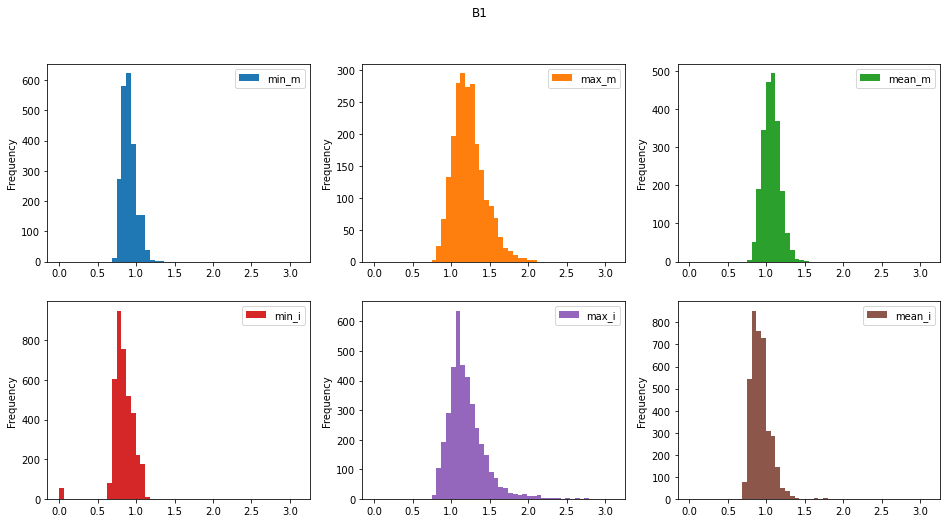

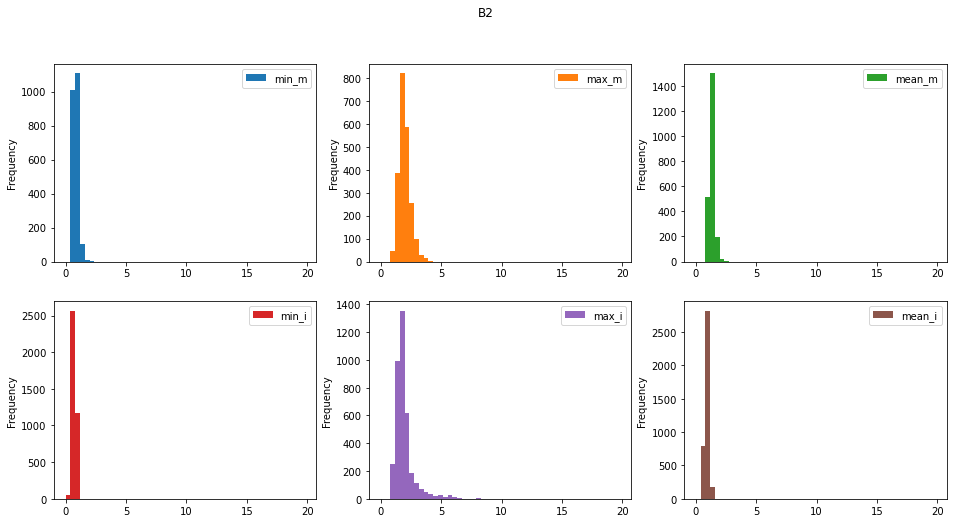

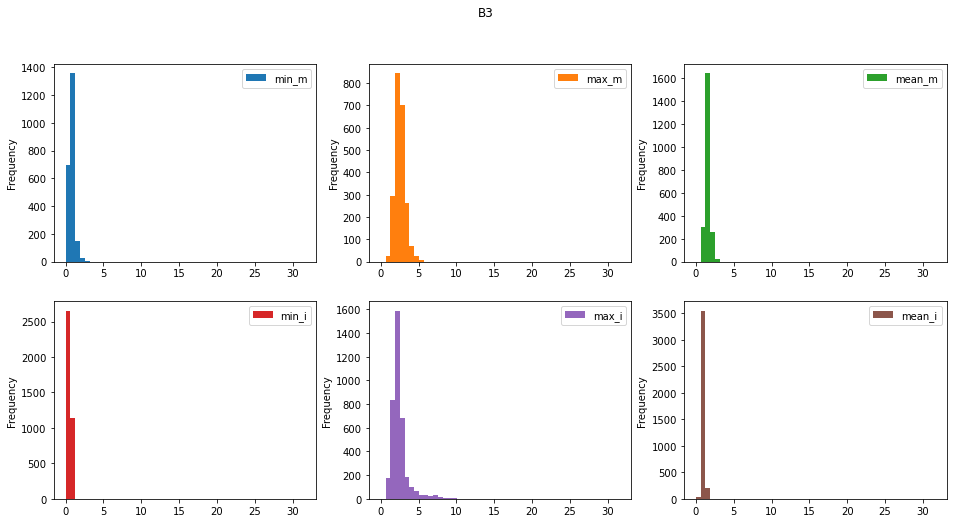

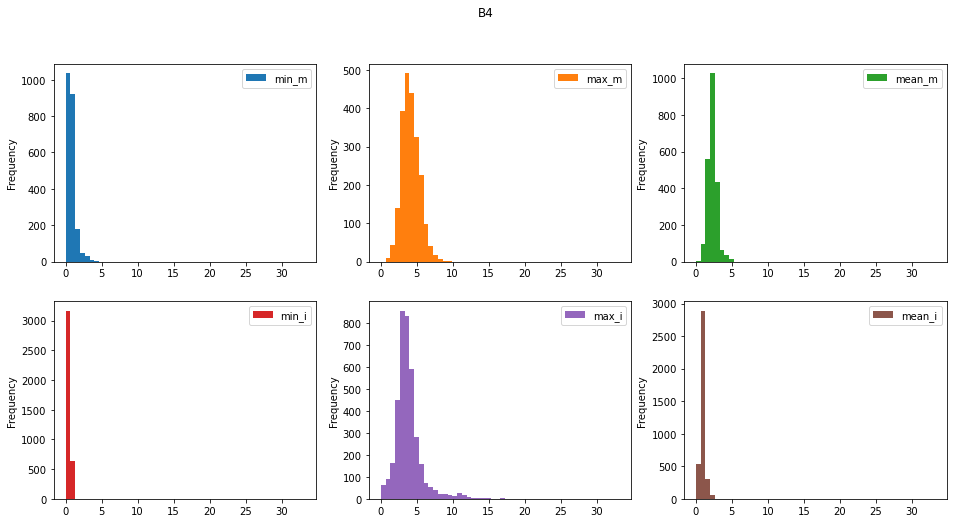

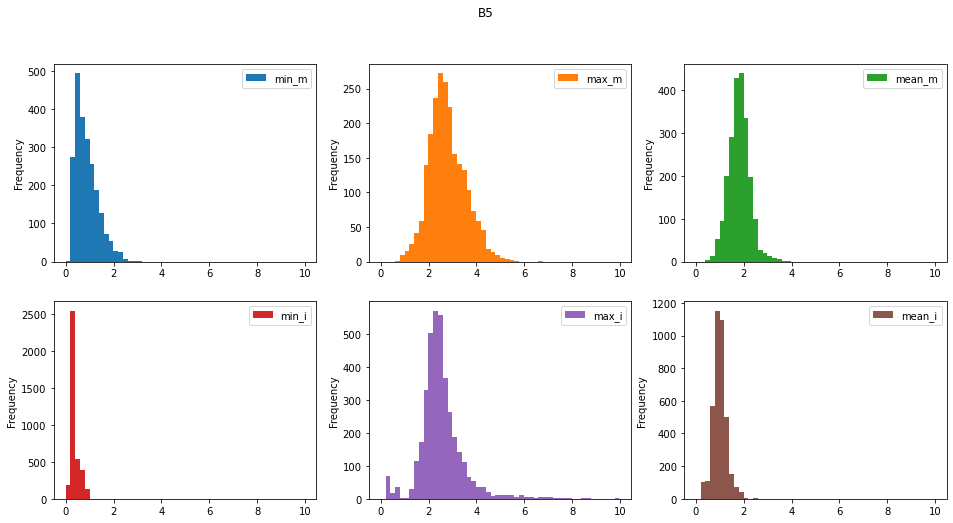

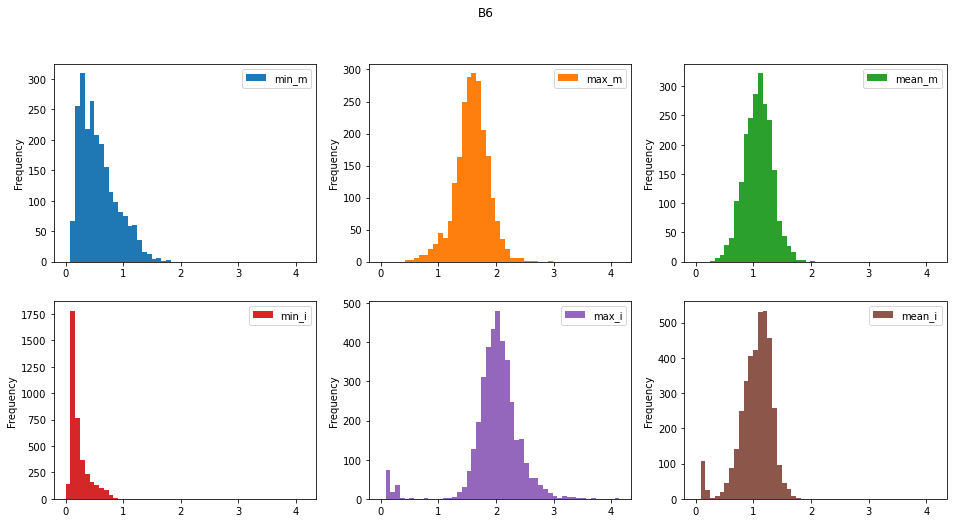

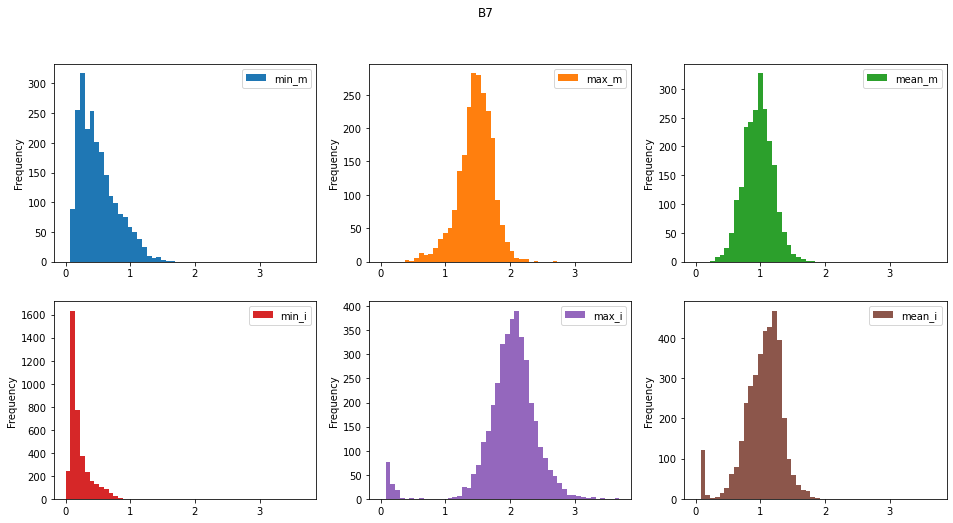

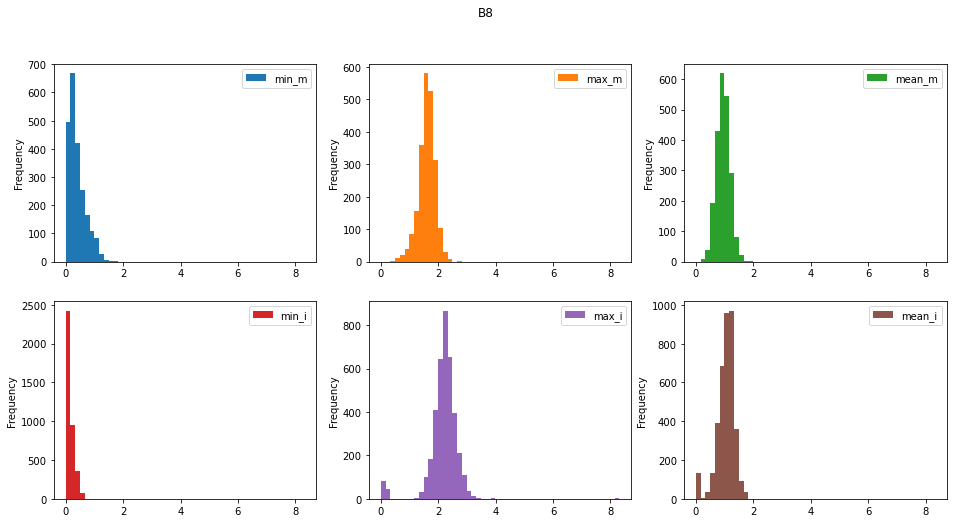

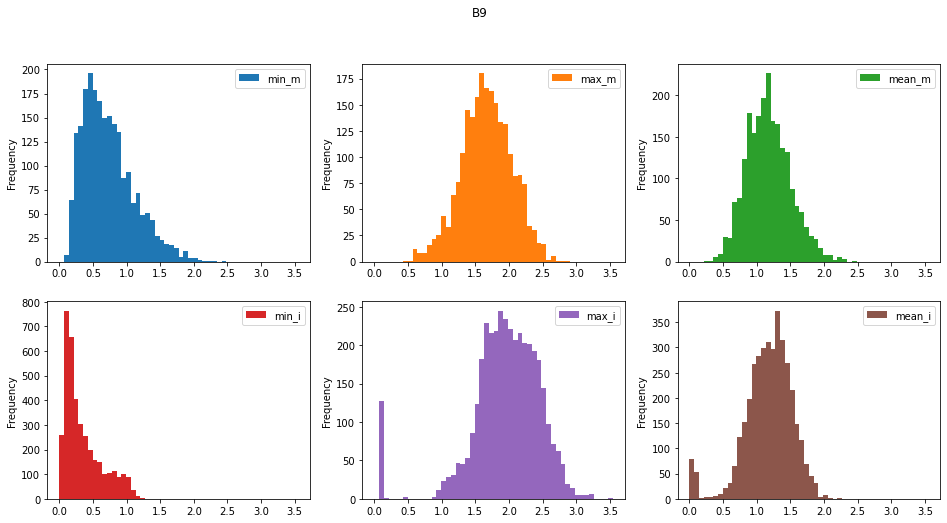

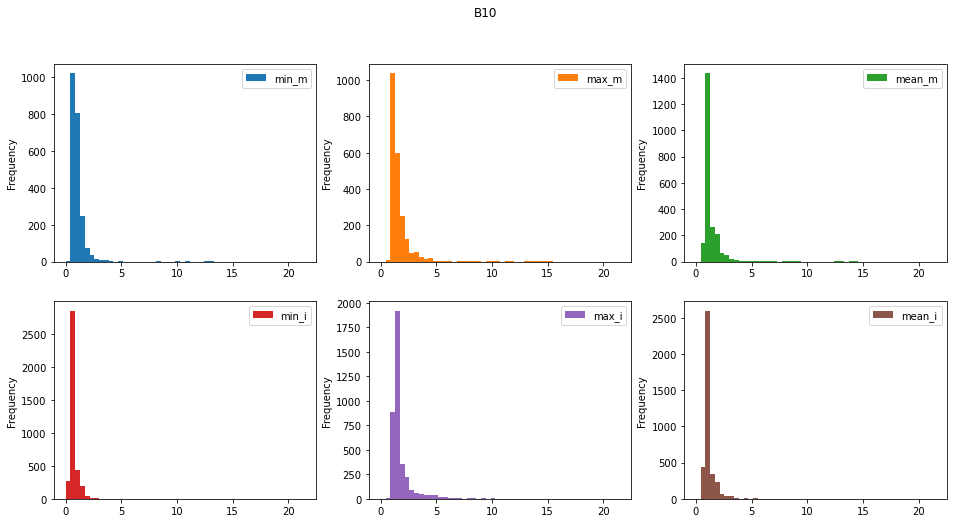

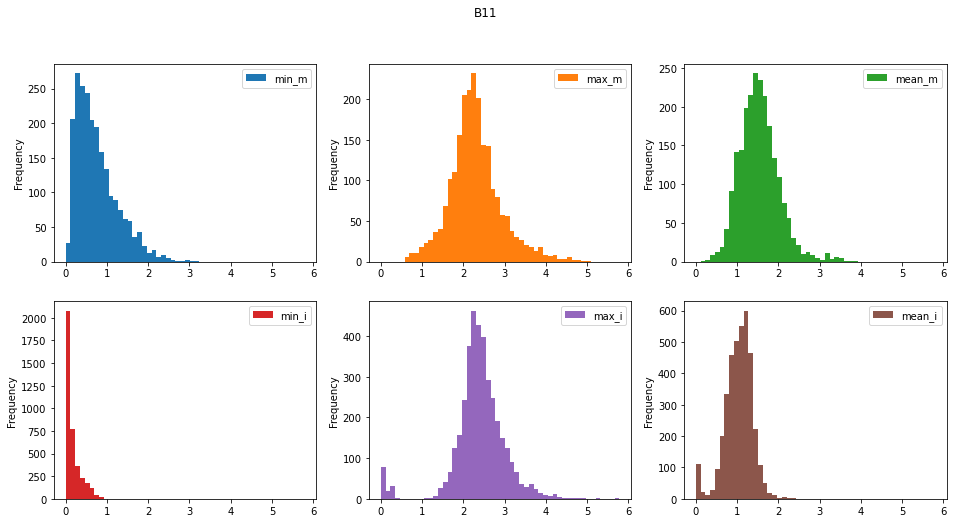

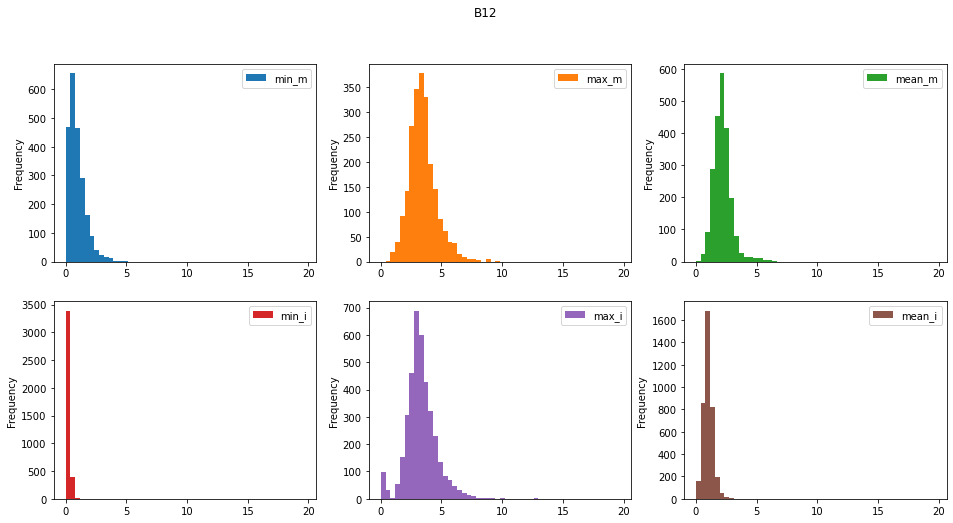

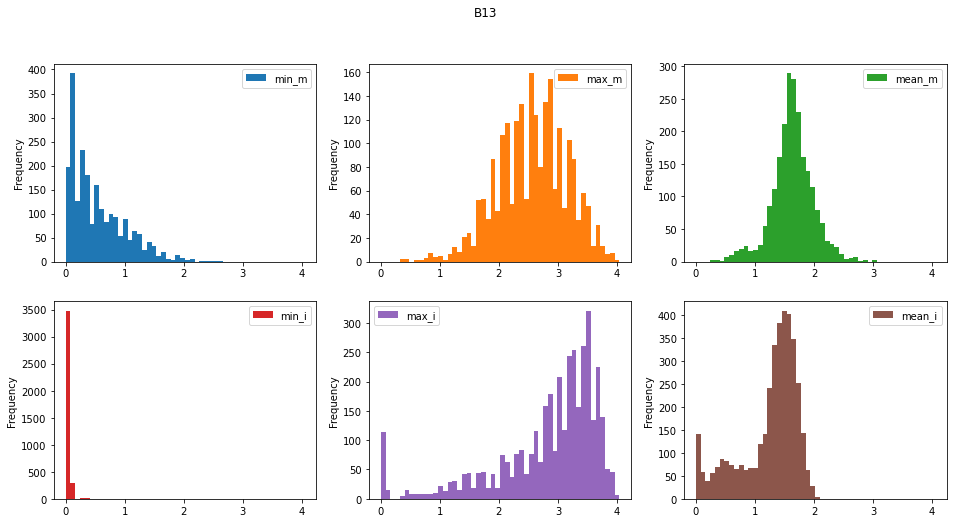

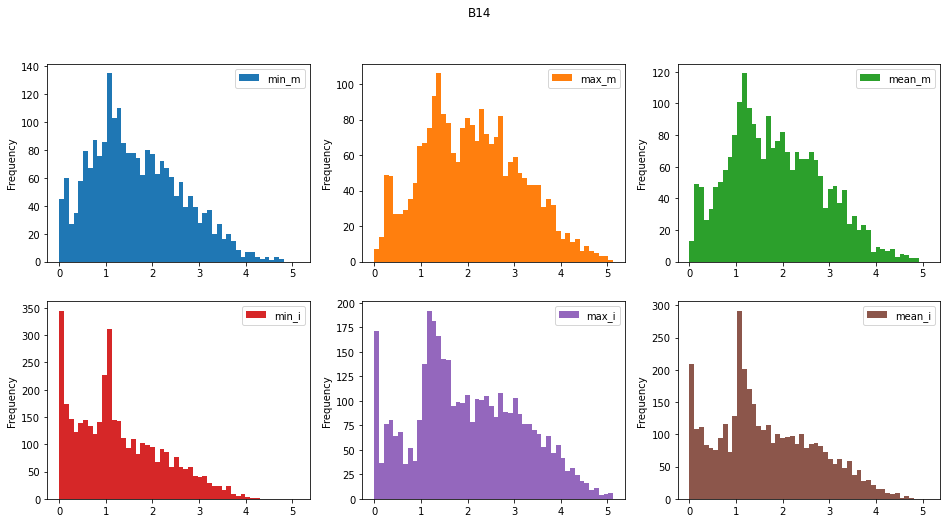

In [57]:
da_landslide = pd.read_csv("parametros_imagenes.csv")
for i in range(14):
    da_landslide_banda = da_landslide[da_landslide['banda']==bandas[i]]
    fig = plt.figure(figsize=(16,8))
    #da_landslide_banda.plot.hist(subplots=True, layout=(4,1))
    ax = fig.add_subplot(111)
    df = pd.DataFrame(da_landslide_banda[["min_m","max_m","mean_m","min_i","max_i","mean_i"]])
    df.plot.hist(ax=ax, subplots=True,  bins=50 , layout=(2,3), title = bandas[i]) 
    #plt.suptitle(bandas[i])


In [58]:
aggr_landslide = da_landslide.groupby('banda').agg(MIN_V=('min','min'), MAX_V=('max','max')).reset_index()

In [60]:
aggr_landslide.head(15)

,banda,MIN_V,MAX_V
0,B1,0.0,3.105740
1,B10,0.0,21.441501
2,B11,0.0,5.786442
3,B12,0.0,19.661323
4,B13,0.0,4.040945
5,B14,0.0,5.121427
6,B2,0.0,19.761549
7,B3,0.0,31.551830
8,B4,0.0,33.160150
9,B5,0.0,9.972776


In [63]:
print(train_folder)
for fichero_t in glob.glob(train_folder ):
    f_name = os.path.basename(fichero_t)
    nueva_imagen =  np.zeros((128, 128, 14))
    l = np.count_nonzero(masks)
    if l == 0: continue
    train_imagen = h5py.File(fichero_t, 'r')
    imagen = train_imagen['img']
    num_bandas = imagen.shape[2]
    for i in range(num_bandas):
        banda = imagen[:, :, i]
        indice = len(da_landslide)
        banda_tot = np.ma.array(banda)
        banda_reclass = (banda_tot - aggr_landslide.loc[i,'MIN_V'])/(aggr_landslide.loc[i,'MAX_V'] - aggr_landslide.loc[i,'MIN_V'])
        nueva_imagen[:,:,i]= banda_reclass
    nuevo_fichero = os.path.join(edt_folder, f_name) 
    if (os.path.exists(nuevo_fichero)):
        os.remove(nuevo_fichero)
    hf = h5py.File(nuevo_fichero , 'w')
    hf.create_dataset('img', data= nueva_imagen)
    hf.close

C:\temp\UOC\TrainData\img\*.h5


<KeysViewHDF5 ['img']>
(128, 128, 14)


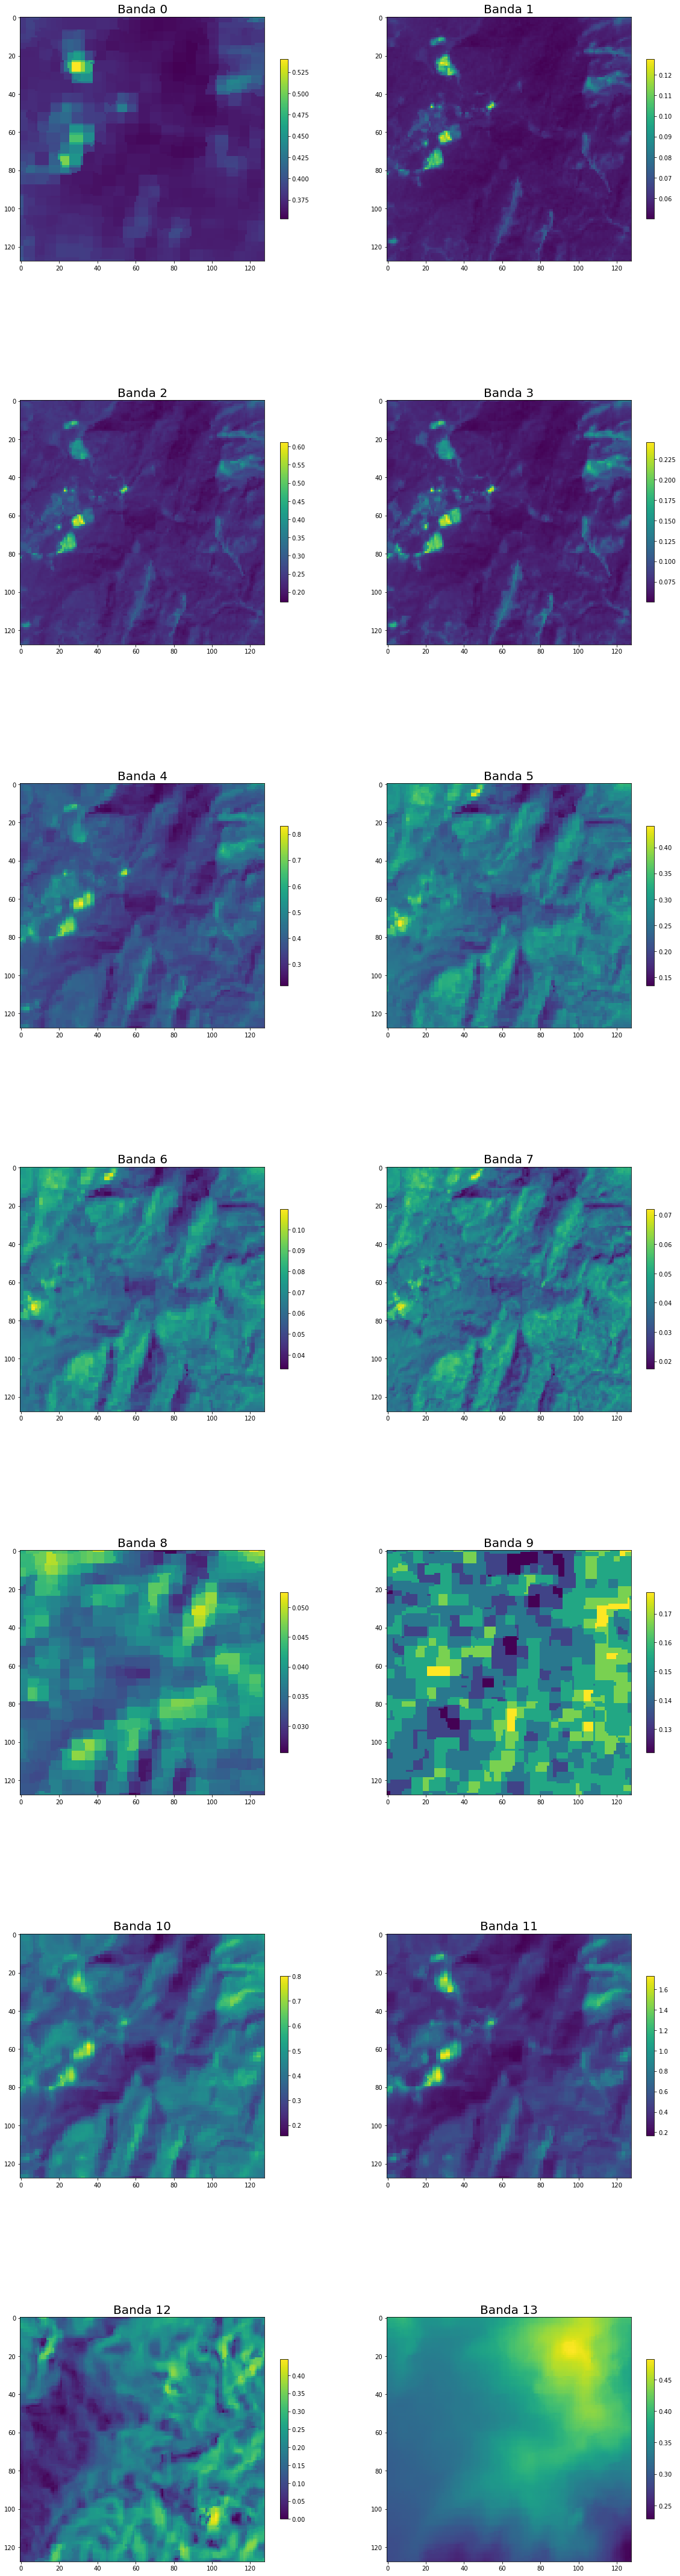

In [64]:
cmap = cm.viridis
fichero_ejemplo = os.path.join (edt_folder, 'image_1.h5')
example_dt = h5py.File(fichero_ejemplo,'r')

# see what is inside that h5 file
print(example_dt.keys())

images = example_dt['img']
print(images.shape)

plt.subplots(7,2,figsize = (20,80))

for i in range(14):
    img_np = images[:,:,i]
    plt.subplot(7,2,1+i)
    #plt.figsize=(10,10)
    plt.imshow(img_np)
    plt.title("Banda " + str(i) ,fontdict={'fontsize': 20})
    plt.colorbar(shrink=0.5)
plt.show()